# Regression Tree

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示十個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

boston = load_boston()
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']
# 如果你想要的話，你可以把他輸出成 csv 觀察看看
# df.to_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,...,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,...,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,...,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,...,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,...,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,...,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,...,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,...,311.0,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,...,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,...,391.0,19.2,396.90,14.33,16.8


# 補充：你可以使用 
- https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

選擇一個你喜歡的調色盤放入 cmap 參數

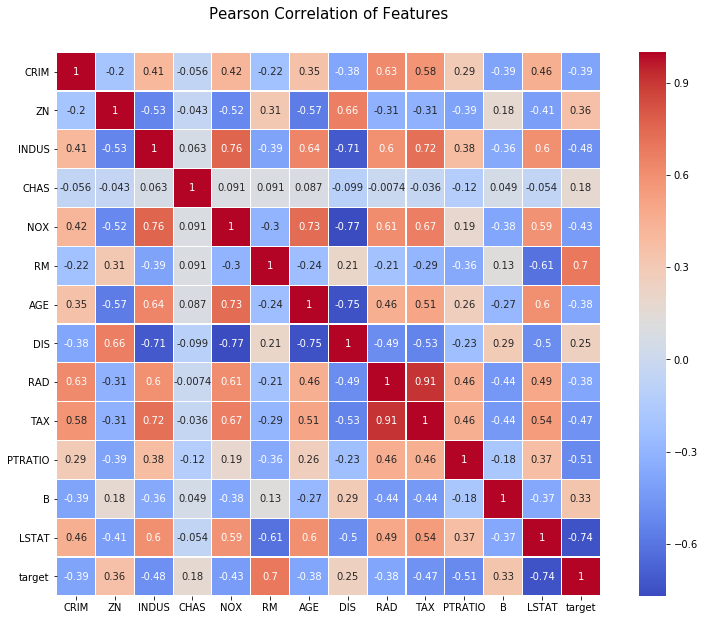

In [2]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "coolwarm", linewidths=0.1,
            square=True, linecolor='white', annot=True)

In [3]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(boston['data'],
                                                                    boston['target'],
                                                                    test_size=0.1)

In [4]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth = 3)
regr.fit(data_train, target_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

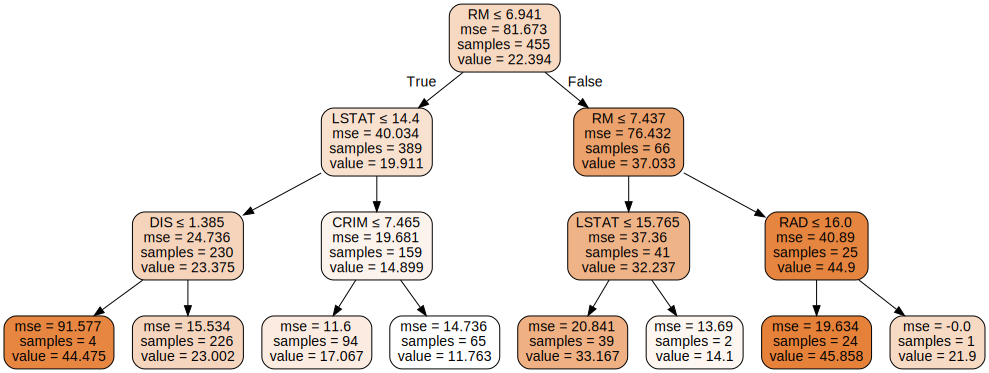

In [5]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(regr, out_file=None,
                            feature_names=df.columns[:-1],
                            filled=True, rounded=True,
                            special_characters=True)

graph = graphviz.Source(dot_data)
# 你可以把註解解除, 輸出一個 pdf
# graph.render("boston")
graph

In [6]:
print(type(df.columns), "\n", df.columns)
print(type(boston.feature_names), "\n", boston.feature_names)
print(type(list(df.columns)), "\n", list(df.columns))
print(type(df.columns.to_numpy()), "\n", df.columns.to_numpy())
print(boston.feature_names == df.columns[:-1].to_numpy())
import numpy 
print(boston.feature_names == numpy.asarray(df.columns[:-1]))
print(boston.feature_names == df.columns[:-1])

<class 'pandas.core.indexes.base.Index'> 
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')
<class 'numpy.ndarray'> 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'list'> 
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']
<class 'numpy.ndarray'> 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'target']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]


In [7]:
# 我們可以直接使用 numpy 來實現兩個 list 的直接相減
import numpy as np
predict = regr.predict(data_test)
print("實際的價錢:\n", target_test)
print("預測的價錢:\n", predict)
interval = np.subtract(predict, target_test)
print("差異:\n", interval)

實際的價錢:
 [39.8 13.3 20.6 15.  19.8 23.7 17.9 18.5 19.6  8.5 21.4 19.9 23.1 18.2
 22.2 20.5 22.9 24.3 17.5 24.6 22.7 13.6 21.7 22.4 43.8 50.  24.8 48.3
 48.5 20.1 15.7 14.3 21.  37.2 14.5 14.6 27.5  8.3 36.5 11.  21.6 50.
 37.  29.8 27.5 16.4 23.4 21.4 16.7 22.4 18.2]
預測的價錢:
 [45.85833333 17.06702128 23.00176991 33.16666667 17.06702128 23.00176991
 11.76307692 17.06702128 23.00176991 11.76307692 23.00176991 17.06702128
 23.00176991 23.00176991 23.00176991 23.00176991 23.00176991 23.00176991
 17.06702128 23.00176991 23.00176991 17.06702128 23.00176991 17.06702128
 45.85833333 44.475      23.00176991 45.85833333 45.85833333 23.00176991
 17.06702128 17.06702128 23.00176991 33.16666667 23.00176991 11.76307692
 23.00176991 11.76307692 33.16666667 17.06702128 23.00176991 45.85833333
 33.16666667 33.16666667 23.00176991 17.06702128 23.00176991 23.00176991
 11.76307692 23.00176991 23.00176991]
差異:
 [ 6.05833333  3.76702128  2.40176991 18.16666667 -2.73297872 -0.69823009
 -6.13692308 -1.43297872 

In [8]:
from sklearn.metrics import r2_score
print("訓練資料 r2 score:", r2_score(target_train,regr.predict(data_train)))
print("測試資料 r2 score:", r2_score(target_test,regr.predict(data_test)))

訓練資料 r2 score: 0.8052682213352349
測試資料 r2 score: 0.8336243977787254


In [9]:
regr.feature_importances_

array([0.0361252 , 0.        , 0.        , 0.        , 0.        ,
       0.63606445, 0.        , 0.06056247, 0.01841419, 0.        ,
       0.        , 0.        , 0.24883368])